<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml13_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  # contour plot

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC  # SVM을 이용한 분류(Classification)
from sklearn.svm import LinearSVR, SVR  # SVM을 이용한 회귀(Regression)

# Linear SVM Classification(선형 SVM 분류)

In [2]:
# iris 데이터 셋을 로드
iris = datasets.load_iris()

In [5]:
# iris에서 특성 2개(petal length, petal width) 선택, 클래스 2개(setosa, versicolor) 선택
features = iris['data']  # (150, 4) shape의 2d array
target = iris['target']  # (150,) shape의 1d array

In [6]:
X = features[:100, -2:]
y = target[:100]

In [7]:
X.shape  # (100, 2)

(100, 2)

In [8]:
y.shape  # (100,)

(100,)

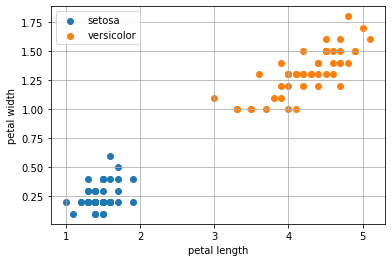

In [13]:
# 샘플들 시각화
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='versicolor')
plt.grid()
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [14]:
# 특성들을 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

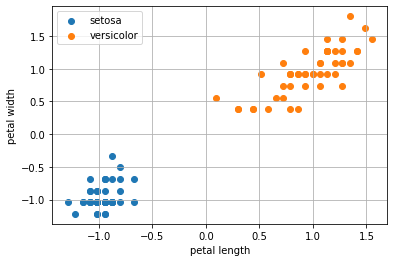

In [15]:
# 스케일링된 특성들을 시각화
plt.scatter(X_scaled[:50, 0], X_scaled[:50, 1], label='setosa')
plt.scatter(X_scaled[50:, 0], X_scaled[50:, 1], label='versicolor')
plt.grid()
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [16]:
# 선형 SVM 분류기 생성
lin_svc = LinearSVC(random_state=0)

In [17]:
# 모델 훈련
lin_svc.fit(X_scaled, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

SVM 분류기를 훈련(데이터에 맞춤)시킨다는 것은 클래스 사이의 마진(margin)이 최대가 되는 초평면(hyperplane)을 찾는다는 의미. 초평면의 방정식을 찾는다는 의미.

$$
w_0 + w_1 x_1 + w_2 x_2 = 0
$$

위 방정식에서 계수들($ w_0, w_1, w_2 $)을 찾는다는 의미.

In [18]:
lin_svc.intercept_

array([0.26072943])

In [20]:
w0 = lin_svc.intercept_[0]

In [19]:
lin_svc.coef_

array([[0.90013736, 0.83424108]])

In [22]:
w1, w2 = lin_svc.coef_[0]

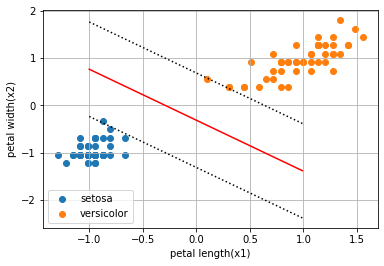

In [25]:
# 데이터와 SVM이 찾은 hyperplane(직선)을 시각화
plt.scatter(X_scaled[:50, 0], X_scaled[:50, 1], label='setosa')
plt.scatter(X_scaled[50:, 0], X_scaled[50:, 1], label='versicolor')

# SVM 머신이 찾은 hyperplane
xs = np.arange(-1.0, 1.0, 0.01)
ys = -(1/w2) * (w0 + w1 * xs)
plt.plot(xs, ys, 'r-')
plt.plot(xs, ys+1, 'k:')  # margin 평면
plt.plot(xs, ys-1, 'k:')  # margin 평면

plt.grid()
plt.legend()
plt.xlabel('petal length(x1)')
plt.ylabel('petal width(x2)')
plt.show()

In [27]:
lin_svc.score(X_scaled, y)  # 훈련 셋에서의 정확도

1.0